# Nice to Meat You : An Analysis on Meat Consumption

## Introduction

Meat consumption is a highly controversial topic in nowadays society in terms of [environment](https://www.theguardian.com/environment/2018/oct/10/huge-reduction-in-meat-eating-essential-to-avoid-climate-breakdown), [health](https://gamechangersmovie.com/), and [ethical](http://traslosmuros.com/en/slaughterhouse-documentary/) reasons. This situation introduces different ways of consuming meat and divides people according to their behaviors such as vegan, vegetarian, occasional meat consumer, and people consuming large amounts of meats.

In this project, we are particularly interested in the factors related to consuming meat and how the behavior of households varies according to their meat consumption. We are going to focus on demographic information such as economic status, family composition, age, and their relation with consuming meat. Moreover, we are going to study external effects that are related to meat consumption such as seasonal changes, campaigns, and discounts. Finally, we are going to categorize households according to their meat consumption and perform a behavior analysis per category.

To do so, we are going to use the Dunnhumby dataset. This dataset contains shopping information collected over two years from a group of 2,500 households as well as their information for each household. Moreover, we are planning to expand our analysis with an additional dataset about nutritional information.


## Factors that influence meat consumption

### Loading the data

In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup

In [38]:
products = pd.read_csv('dunnhumby/product.csv', sep = ',')

### Characterising the products

The first step of the project is to correctly collect the products for each category in which we want to do further analysis. The objective is to be able to select food products, meat products and vegetables. 

In [44]:
products.columns

Index(['PRODUCT_ID', 'MANUFACTURER', 'DEPARTMENT', 'BRAND', 'COMMODITY_DESC',
       'SUB_COMMODITY_DESC', 'CURR_SIZE_OF_PRODUCT'],
      dtype='object')

There are 7 columns and three of them allow us to have information about the type of the product. The broadest one is 'DEPARTMENT'. Each one of these contains one or more 'COMMODITY_DESC' which contain 'SUB_COMMODITY_DESC'. In the following parts the idea will be to start scratching products from 'DEPARTMENT' category and then go lower into the levels of precision.

In [40]:
print('There are {0} unique products distributed in {1} different departments.'.format(len(products['PRODUCT_ID'].unique()), len(products['DEPARTMENT'].unique())))

There are 92353 unique products distributed in 44 different departments.


For this project, the main interest is food products. Therefore, a database with only food-related departments is created.

In [46]:
food_dep = ['GROCERY', 'PASTRY', 'MEAT-PCKGD','SEAFOOD-PCKGD', 'PRODUCE', 'NUTRITION', 'DELI',
       'MEAT', 'SEAFOOD', 'SALAD BAR', 'GRO BAKERY','FROZEN GROCERY', 'SPIRITS', 'RESTAURANT',
       'DAIRY DELI', 'CHEF SHOPPE', 'DELI/SNACK BAR', 'PORK']
food_products = products[products.DEPARTMENT.isin(food_dep)].copy()
print('There are {0} unique food products distributed in {1} different departments.'.format(len(food_products['PRODUCT_ID'].unique()), len(food_products['DEPARTMENT'].unique())))
food_products.groupby("DEPARTMENT")\
                                   .count()["PRODUCT_ID"]\
                                   .sort_values(ascending=False)

There are 56031 unique products distributed in 18 different departments.


DEPARTMENT
GROCERY           39021
PRODUCE            3118
NUTRITION          2914
MEAT               2544
MEAT-PCKGD         2427
DELI               2354
PASTRY             2149
SEAFOOD-PCKGD       563
SPIRITS             377
SEAFOOD             369
RESTAURANT          102
SALAD BAR            48
FROZEN GROCERY       23
CHEF SHOPPE          14
DAIRY DELI            3
GRO BAKERY            2
DELI/SNACK BAR        2
PORK                  1
Name: PRODUCT_ID, dtype: int64

The GROCERY department contains nearly 70% of the products in the food sector. It may be useful to have a deeper look in it for better information on the type of products it contains.

In [47]:
food_products[food_products.DEPARTMENT == 'GROCERY'].COMMODITY_DESC.unique()

array(['FRZN ICE', 'FRUIT - SHELF STABLE', 'COOKIES/CONES',
       'SPICES & EXTRACTS', 'PNT BTR/JELLY/JAMS',
       'ICE CREAM/MILK/SHERBTS', 'AIR CARE', 'CHEESE', 'SHORTENING/OIL',
       'COFFEE', 'PAPER HOUSEWARES', 'BAKED BREAD/BUNS/ROLLS',
       'VEGETABLES - SHELF STABLE', 'HISPANIC', 'DINNER MXS:DRY',
       'CONDIMENTS/SAUCES', 'FRZN VEGETABLE/VEG DSH', 'BAKING NEEDS',
       'FRZN FRUITS', 'HOUSEHOLD CLEANG NEEDS', 'FD WRAPS/BAGS/TRSH BG',
       'DRY MIX DESSERTS', 'PICKLE/RELISH/PKLD VEG', 'BAKING MIXES',
       'FLUID MILK PRODUCTS', 'SOUP', 'BAKED SWEET GOODS',
       'DRY BN/VEG/POTATO/RICE', 'FACIAL TISS/DNR NAPKIN', 'FROZEN PIZZA',
       'EGGS', 'REFRGRATD DOUGH PRODUCTS', 'HOT CEREAL', 'COLD CEREAL',
       'SUGARS/SWEETNERS', 'SEAFOOD - SHELF STABLE', 'CANNED JUICES',
       'BAG SNACKS', 'BEANS - CANNED GLASS & MW', 'CRACKERS/MISC BKD FD',
       'CONVENIENT BRKFST/WHLSM SNACKS', 'SOFT DRINKS', 'BUTTER',
       'FRZN MEAT/MEAT DINNERS', 'WATER - CARBONATED/FLVRD D

It is clearly seen that some of the COMMODITY_DESC correspond to housecleaning and non-food commodities. 
Therefore, they have to be removed in the next step.

In [119]:
non_food_groceries = ['AIR CARE', 'PAPER HOUSEWARES', 'HOUSEHOLD CLEANG NEEDS', 'FD WRAPS/BAGS/TRSH BG', 'FACIAL TISS/DNR NAPKIN',\
                     'LAUNDRY DETERGENTS', 'LAUNDRY ADDITIVES', 'CAT FOOD', 'BATH TISSUES', 'DOG FOODS', 'BLEACH', 'PAPER TOWELS',\
                     'DISHWASH DETERGENTS', 'CAT LITTER', 'COUPON/MISC ITEMS', 'PET CARE SUPPLIES', 'BIRD SEED', 'BOTTLE DEPOSITS']
food_products = food_products[food_products['COMMODITY_DESC'].isin(non_food_groceries) == 0]
print('There are {0} unique food products distributed in {1} different departments.'.format(len(food_products['PRODUCT_ID'].unique()), len(food_products['DEPARTMENT'].unique())))
food_products.groupby("DEPARTMENT")\
                                   .count()["PRODUCT_ID"]\
                                   .sort_values(ascending=False)

There are 51341 unique food products distributed in 18 different departments.


DEPARTMENT
GROCERY           34331
PRODUCE            3118
NUTRITION          2914
MEAT               2544
MEAT-PCKGD         2427
DELI               2354
PASTRY             2149
SEAFOOD-PCKGD       563
SPIRITS             377
SEAFOOD             369
RESTAURANT          102
SALAD BAR            48
FROZEN GROCERY       23
CHEF SHOPPE          14
DAIRY DELI            3
GRO BAKERY            2
DELI/SNACK BAR        2
PORK                  1
Name: PRODUCT_ID, dtype: int64

In [152]:
food_products.COMMODITY_DESC.unique()

array(['FRZN ICE', 'BREAD', 'FRUIT - SHELF STABLE', 'COOKIES/CONES',
       'SPICES & EXTRACTS', 'BREAKFAST SWEETS', 'PNT BTR/JELLY/JAMS',
       'ICE CREAM/MILK/SHERBTS', 'CHEESE', 'SHORTENING/OIL', 'COFFEE',
       'BAKED BREAD/BUNS/ROLLS', 'VEGETABLES - SHELF STABLE', 'HISPANIC',
       'DINNER MXS:DRY', 'CONDIMENTS/SAUCES', 'FRZN VEGETABLE/VEG DSH',
       'BAKING NEEDS', 'DINNER SAUSAGE', 'FRZN FRUITS',
       'SEAFOOD - FROZEN', 'DRY MIX DESSERTS', 'PICKLE/RELISH/PKLD VEG',
       'CAKES', 'BAKING MIXES', 'POTATOES', 'FLUID MILK PRODUCTS', 'SOUP',
       'BAKED SWEET GOODS', 'COOKIES', 'DRY BN/VEG/POTATO/RICE',
       'FROZEN PIZZA', 'EGGS', 'REFRGRATD DOUGH PRODUCTS', 'HOT CEREAL',
       'COLD CEREAL', 'SUGARS/SWEETNERS', 'SEAFOOD - SHELF STABLE',
       'POPCORN', 'CANNED JUICES', 'BAG SNACKS',
       'BEANS - CANNED GLASS & MW', 'FROZEN MEAT', 'ROLLS',
       'NON-DAIRY BEVERAGES', 'CRACKERS/MISC BKD FD',
       'CONVENIENT BRKFST/WHLSM SNACKS', 'CHIPS&SNACKS', 'SOFT DRINKS',

## Scrape some websites to create a list of meat-related words

To find a maximum of meat related products, we have decided to refer to two different websites (https://www.listchallenges.com/types-of-meat and  https://www.manythings.org/vocabulary/lists/c/words.php) to get the words related to meat. These words are then used to select all the products whose DEPARTMENT, COMMODITY_DESC or SUB_COMMODITY_DESC contain one of these words.

In [75]:
meat_words = []

In [76]:
# First Website
urls = ["https://www.listchallenges.com/types-of-meat", "https://www.listchallenges.com/types-of-meat/list/2"]
for url in urls:
    r = get(url)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    meat_divs = soup.findAll("div", {"class": "item-name"})
    meat_words.extend([div.text.upper().strip() for div in meat_divs])
# Second Website   
base_url = "https://www.manythings.org/vocabulary/lists/c/words.php"
urls = [base_url + "?f=meat", base_url + "?f=fish"]
for url in urls:
    r = get(url)
    page_body = r.text
    soup = BeautifulSoup(page_body, 'html.parser')
    meat_li = soup.findAll("li")
    meat_words.extend([li.text.upper().strip() for li in meat_li])

In [77]:
# add particular words that are not in both websites
meat_words.extend(["SALAMI", "HAM", "POULTRY", "SEAFOOD", "FISH","MEAT","MEATS"])
print(meat_words)

['ANCHOVY', 'BACON', 'BEEF', 'BUFFALO', 'CARIBOU', 'CATFISH', 'CHICKEN', 'CLAMS', 'COD', 'CORNISH GAME HEN', 'CRAB', 'DUCK', 'EEL', 'EMU', 'GOAT', 'GOOSE', 'GROUSE', 'HALIBUT', 'HAM', 'KANGAROO', 'LAMB', 'LOBSTER', 'MACKEREL', 'MAHI MAHI', 'OCTOPUS', 'OSTRICH', 'OYSTERS', 'PHEASANT', 'PORK', 'QUAIL', 'RABBIT', 'SALMON', 'SARDINES', 'SCALLOPS', 'SHARK', 'SHRIMP', 'SNAKE', 'SQUAB', 'SQUID', 'SWORDFISH', 'TILAPIA', 'TUNA', 'TURKEY', 'VEAL', 'VENISON', 'SALAMI', 'HAM', 'POULTRY', 'SEAFOOD', 'FISH', 'MEAT', 'MEATS']


In [138]:
meat_words_regex = [r'\b%s\b' % word for word in meat_words]
full_regex = re.compile('|'.join(meat_words_regex))
meat_products = products[food_products.DEPARTMENT.str.contains(full_regex, regex=True)|\
                          food_products.COMMODITY_DESC.str.contains(full_regex, regex=True) |\
                          products.SUB_COMMODITY_DESC.str.contains(full_regex, regex=True)]
print('There are {0} meat products distributed in {1} different departments.'.format(len(meat_products['PRODUCT_ID'].unique()), len(meat_products['DEPARTMENT'].unique())))
meat_products['COMMODITY_DESC'].unique()

There are 9035 meat products distributed in 9 different departments.


array(['DINNER SAUSAGE', 'SEAFOOD - FROZEN', 'SEAFOOD - SHELF STABLE',
       'FROZEN MEAT', 'FRZN MEAT/MEAT DINNERS',
       'BEANS - CANNED GLASS & MW', 'MEAT - SHELF STABLE', 'MEAT - MISC',
       'LUNCHMEAT', 'BREAKFAST SAUSAGE/SANDWICHES', 'BACON', 'HOT DOGS',
       'CHICKEN', 'HEAT/SERVE', 'DELI MEATS', 'BEEF', 'MISCELLANEOUS',
       'WAREHOUSE SNACKS', 'CHICKEN/POULTRY', 'TURKEY', 'SEAFOOD-FRESH',
       'SEAFOOD - MISC', 'MISC. DAIRY', 'FROZEN CHICKEN', 'SMOKED MEATS',
       'DINNER MXS:DRY', 'PORK', 'SALADS/DIPS', '(CORP USE ONLY)',
       'CONDIMENTS/SAUCES', 'LAMB', 'BAKING NEEDS', 'DRY SAUCES/GRAVY',
       'PARTY TRAYS', 'FROZEN', 'REFRIGERATED', 'VEAL', 'PASTA SAUCE',
       'FROZEN - BOXED(GROCERY)', 'FRZN SEAFOOD', 'SPICES & EXTRACTS',
       'PREPARED/PKGD FOODS', 'PREPARED FOOD', 'RW FRESH PROCESSED MEAT',
       'EXOTIC GAME/FOWL', 'MEAT SUPPLIES', 'DELI SUPPLIES',
       'BAKING MIXES', 'BAG SNACKS', 'PKG.SEAFOOD MISC', 'HISPANIC',
       'BREAKFAST SWEETS', 'DEL

As for food products, some products are incorrectly placed in the meat category. They have to be removed by hand as before.

In [175]:
meat_drops_sub = [ 'FROZEN MEAT (VEGETARIAN)', 'VEGETARIAN MEATS', 'FRZN MEAT ALTERNATIVES', 'SAUERKRAUT', 'PICKLES',\
                  'SALADS', 'CHEESE', 'PICKLE ITEMS', 'SAL:OLIVES/PICKLES-BULK', 'POTATOES PROCESSED',\
                  'NON-MEATS - OTHER', 'MISC SALES TRANS', 'NON-MEATS - OTHER']
meat_products = meat_products[meat_products['SUB_COMMODITY_DESC'].isin(meat_drops_sub) == 0]
print('There are {0} meat products distributed in {1} different departments.'.format(len(meat_products['PRODUCT_ID'].unique()), len(meat_products['DEPARTMENT'].unique())))
meat_products.groupby("DEPARTMENT")\
                                   .count()["PRODUCT_ID"]\
                                   .sort_values(ascending=False)

There are 8783 meat products distributed in 9 different departments.


DEPARTMENT
MEAT             2527
MEAT-PCKGD       2346
GROCERY          2235
DELI              720
SEAFOOD-PCKGD     563
SEAFOOD           369
NUTRITION          21
PORK                1
PASTRY              1
Name: PRODUCT_ID, dtype: int64

In [176]:
meat_products['COMMODITY_DESC'].unique()

array(['DINNER SAUSAGE', 'SEAFOOD - FROZEN', 'SEAFOOD - SHELF STABLE',
       'FROZEN MEAT', 'FRZN MEAT/MEAT DINNERS',
       'BEANS - CANNED GLASS & MW', 'MEAT - SHELF STABLE', 'MEAT - MISC',
       'LUNCHMEAT', 'BREAKFAST SAUSAGE/SANDWICHES', 'BACON', 'HOT DOGS',
       'CHICKEN', 'HEAT/SERVE', 'DELI MEATS', 'BEEF', 'WAREHOUSE SNACKS',
       'CHICKEN/POULTRY', 'TURKEY', 'SEAFOOD-FRESH', 'SEAFOOD - MISC',
       'MISC. DAIRY', 'FROZEN CHICKEN', 'SMOKED MEATS', 'DINNER MXS:DRY',
       'PORK', 'SALADS/DIPS', '(CORP USE ONLY)', 'CONDIMENTS/SAUCES',
       'LAMB', 'BAKING NEEDS', 'DRY SAUCES/GRAVY', 'PARTY TRAYS', 'VEAL',
       'PASTA SAUCE', 'FROZEN - BOXED(GROCERY)', 'FRZN SEAFOOD',
       'SPICES & EXTRACTS', 'PREPARED/PKGD FOODS', 'PREPARED FOOD',
       'RW FRESH PROCESSED MEAT', 'EXOTIC GAME/FOWL', 'MISCELLANEOUS',
       'MEAT SUPPLIES', 'DELI SUPPLIES', 'BAKING MIXES', 'BAG SNACKS',
       'PKG.SEAFOOD MISC', 'HISPANIC', 'BREAKFAST SWEETS', 'FROZEN',
       'DELI SPECIALTIES (R

We can see that 17.6% of the food products are meat related products. In this part, we will make the distinction between two type of meat products. On one hand, we have all the products containing meat, a list we have just created. On other hand, we have meat and products that are mostly made of meat as sausages. The distinction must be made as the first contains all meat products but isn't exclusive while the second one only contains meat but does not contain it all.

In [248]:
drop_pure = [ 'DINNER MXS:DRY','PASTA SAUCE']
notpurewords = ["PIZZA", "SANDWICH","SANDWICHES","PASTA","CHILI", "STEW", "HASH","GRASS/SHRED","KITES","REGIONAL","ENTREES","BEANS",\
               "SAUCES","NOODLES","RICE","DAIRY","CONDIMENTS","SAUS","CHEESE","SPICES","BREADERS"]
pure_meat = meat_products[meat_products['COMMODITY_DESC'].isin(drop_pure) == 0].copy()
notpure_regex = [r'\b%s\b' % word for word in notpurewords]
full_regex = re.compile('|'.join(notpure_regex))
pure_meat = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_regex, regex=True) == 0]


After all this part of data scrapping and selecting pure meat products, we want to know which is the meat's proportion for each meat category. There are 5 main categories : pork meat, poultry, bovine meat, ovine meat and seafood. 

In [279]:
pork_words = ['BACON', 'HAM','HAMS', 'PORK', 'SALAMI', 'LINKS', 'SAUSAGE']
bovine_words = ['BEEF', 'BUFFALO', 'VEAL']
ovine_words = ['GOAT', 'LAMB']
poultry_words = ['FOWL','THIGHS', 'DRUMS','CHICKEN','CHICK', 'CORNISH', 'DUCK', 'DUCKS', 'GOOSE', 'GROUSE', 'PHEASANT', 'TURKEY', 'POULTRY', 'HENS', 'BREAST','WINGS']
seafood_words = ['ANCHOVY', 'CATFISH', 'CLAMS', 'COD', 'CRAB', 'EEL', 'HALIBUT', 'LOBSTER', 'MACKEREL', 'MAHI MAHI', 'OCTOPUS', 'OYSTERS', 'QUAIL', 'SALMON', 'SARDINES', 'SCALLOPS', 'SHARK', 'SHRIMP', 'SQUAB', 'SQUID', 'SWORDFISH', 'TILAPIA', 'TUNA', 'SEAFOOD', 'FISH']
pork_regex = [r'\b%s\b' % word for word in pork_words]
full_pork_regex = re.compile('|'.join(pork_regex))
pork_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_pork_regex, regex=True) |\
                         pure_meat.COMMODITY_DESC.str.contains(full_pork_regex, regex=True) ]
bovine_regex = [r'\b%s\b' % word for word in bovine_words]
full_bovine_regex = re.compile('|'.join(bovine_regex))
bovine_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_bovine_regex, regex=True) |\
                         pure_meat.COMMODITY_DESC.str.contains(full_bovine_regex, regex=True)]
ovine_regex = [r'\b%s\b' % word for word in ovine_words]
full_ovine_regex = re.compile('|'.join(ovine_regex))
ovine_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_ovine_regex, regex=True)|\
                         pure_meat.COMMODITY_DESC.str.contains(full_ovine_regex, regex=True)]
poultry_regex = [r'\b%s\b' % word for word in poultry_words]
full_poultry_regex = re.compile('|'.join(poultry_regex))
poultry_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_poultry_regex, regex=True)|\
                         pure_meat.COMMODITY_DESC.str.contains(full_poultry_regex, regex=True)]
seafood_regex = [r'\b%s\b' % word for word in seafood_words]
full_seafood_regex = re.compile('|'.join(seafood_regex))
seafood_products = pure_meat[pure_meat.SUB_COMMODITY_DESC.str.contains(full_seafood_regex, regex=True)|\
                         pure_meat.COMMODITY_DESC.str.contains(full_seafood_regex, regex=True)]




In [280]:
len(seafood_products)+len(ovine_products)+len(bovine_products)+len(poultry_products)+len(pork_products)

5574

In [281]:
other_meat = pure_meat[(pure_meat.PRODUCT_ID.isin(pork_products.PRODUCT_ID) | pure_meat.PRODUCT_ID.isin(bovine_products.PRODUCT_ID)|\
                      pure_meat.PRODUCT_ID.isin(ovine_products.PRODUCT_ID) | pure_meat.PRODUCT_ID.isin(poultry_products.PRODUCT_ID) |\
                      pure_meat.PRODUCT_ID.isin(seafood_products.PRODUCT_ID)) == 0]

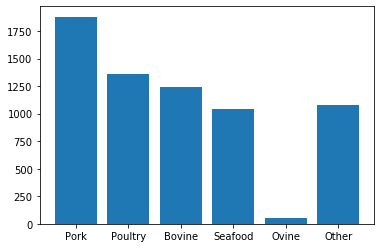

In [288]:
x = np.arange(6)
y = [len(pork_products), len(poultry_products), len(bovine_products),  len(seafood_products), len(ovine_products), len(other_meat)]
plt.bar(x, y)
plt.xticks(x, ( 'Pork', 'Poultry', 'Bovine','Seafood', 'Ovine', 'Other'))
plt.show()

### In which departments is the meat ?

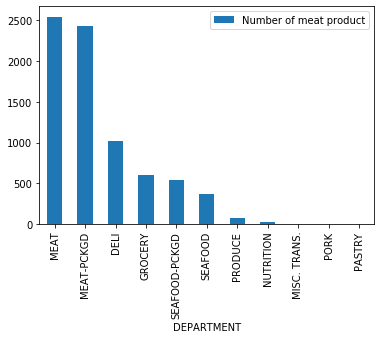

In [9]:
num_of_meat_per_dep = meat_products.groupby("DEPARTMENT")\
                                   .count()["PRODUCT_ID"]\
                                   .sort_values(ascending=False)\
                                   .reset_index(name="Number of meat product")
num_of_meat_per_dep.plot.bar(x="DEPARTMENT", y="Number of meat product")

## Get only vegetables

In [153]:
veggies = [
    "asparagus",
    "beans",
    "beet",
    "broccoli",
    "Brussels sprouts",
    "cabbage",
    "carrot",
    "carrots",
    "cauliflower",
    "celery",
    "Chinese cabbage",
    "corn",
    "cucumber",
    "cucumbers",
    "eggplant",
    "eggplants",
    "green pepper",
    "Japanese radish",
    "kale",
    "lettuce",
    "salad",
    "okra",
    "onion",
    "onions",
    "peas",
    "pumpkins",
    "radish",
    "spinach",
    "sweet potato",
    "tomatoes",
    "tomato",
    "turnips",
    "vegetables"
]
veggies = [v.upper() for v in veggies]

In [154]:
veggie_words_regex = [r'\b%s\b' % word for word in veggies]
full_regex = re.compile('|'.join(veggie_words_regex))

veggie_products = products[food_products.COMMODITY_DESC.str.contains(full_regex, regex=True) |\
                           products.SUB_COMMODITY_DESC.str.contains(full_regex, regex=True)]

In [155]:
veggie_products.COMMODITY_DESC.unique()

array(['SHORTENING/OIL', 'VEGETABLES - SHELF STABLE', 'HISPANIC',
       'FRZN VEGETABLE/VEG DSH', 'CANNED JUICES',
       'BEANS - CANNED GLASS & MW', 'DRY BN/VEG/POTATO/RICE',
       'ORGANICS FRUIT & VEGETABLES', 'CONDIMENTS/SAUCES',
       'SALD DRSNG/SNDWCH SPRD', 'FROZEN MEAT', 'FRUIT - SHELF STABLE',
       'SALAD MIX', 'CARROTS', 'VEGETABLES - ALL OTHERS', 'CORN',
       'BAG SNACKS', 'BAKING MIXES', 'BROCCOLI/CAULIFLOWER', 'ONIONS',
       'CRACKERS/MISC BKD FD', 'SPICES & EXTRACTS', 'VEGETABLES SALAD',
       'VALUE ADDED VEGETABLES', 'TOMATOES', 'SALAD BAR', 'FROZEN',
       'PREPARED/PKGD FOODS', 'HERBS', 'SALADS/DIPS', 'BAKING NEEDS',
       'SOUP', 'SEASONAL', 'UNKNOWN', 'MEAT - SHELF STABLE',
       'PROD SUPPLIES', 'DELI SPECIALTIES (RETAIL PK)', 'FROZEN PIZZA'],
      dtype=object)

In [168]:
drops_vegg = ['SHORTENING/OIL','CONDIMENTS/SAUCES', 'SALD DRSNG/SNDWCH SPRD', 'FROZEN MEAT','BAG SNACKS', 'BAKING MIXES',\
             'CRACKERS/MISC BKD FD', 'SPICES & EXTRACTS','BAKING NEEDS','MEAT - SHELF STABLE','DELI SPECIALTIES (RETAIL PK)', 'FROZEN PIZZA']
veggie_products = veggie_products[veggie_products['COMMODITY_DESC'].isin(drops_vegg) == 0]
print('There are {0} veggetables products distributed in {1} different departments.'.format(len(veggie_products['PRODUCT_ID'].unique()), len(veggie_products['DEPARTMENT'].unique())))


There are 3209 veggetables products distributed in 7 different departments.


In [169]:
len(veggie_products.COMMODITY_DESC.unique())

26

In [31]:
transac_prod = pd.merge(transactions, food_products, on="PRODUCT_ID", how="inner")[["PRODUCT_ID", "PAID_PRICE", "DEPARTMENT"]]

In [32]:
average_price_by_dep = transac_prod.groupby("DEPARTMENT")["PAID_PRICE"].mean().sort_values(ascending=False)
average_price_by_dep

DEPARTMENT
SPIRITS           10.226937
PORK               7.850000
SEAFOOD            5.678356
MEAT               4.395866
RESTAURANT         4.264215
SEAFOOD-PCKGD      3.811378
DELI               3.803988
DELI/SNACK BAR     3.280000
SALAD BAR          3.160173
CHEF SHOPPE        2.869413
PASTRY             2.780976
MEAT-PCKGD         2.697060
NUTRITION          2.659637
FROZEN GROCERY     2.496056
GROCERY            1.997943
PRODUCE            1.912026
DAIRY DELI         1.342642
GRO BAKERY         1.090000
Name: PAID_PRICE, dtype: float64

### How does the basket price evolve over weeks ?

Text(0, 0.5, 'Average Basket Price')

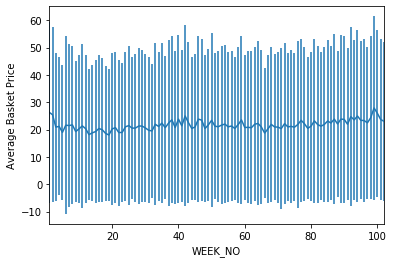

In [33]:
basket_values = transactions.groupby("BASKET_ID").agg({"PAID_PRICE": sum, "WEEK_NO": "first"}).reset_index()
avg_basket_value_per_week = basket_values.groupby("WEEK_NO")["PAID_PRICE"].mean()
std_basket_value_per_week = basket_values.groupby("WEEK_NO")["PAID_PRICE"].std()

avg_basket_value_per_week.plot(yerr=std_basket_value_per_week)
plt.ylabel("Average Basket Price")
# basket_value_per_week.sort_values(ascending=False)

## Which product pays the most ?

In [34]:
transac_prod = pd.merge(transactions, food_products, on="PRODUCT_ID", how="inner")
transac_prod.groupby(['PRODUCT_ID'], as_index=False)\
            .agg({'COMMODITY_DESC': 'first', 'SUB_COMMODITY_DESC': 'first', 'PAID_PRICE': 'sum'})\
            .sort_values(by="PAID_PRICE", ascending=False)\
            .head(10)

,PRODUCT_ID,COMMODITY_DESC,SUB_COMMODITY_DESC,PAID_PRICE
19927,1029743,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,38451.09
23632,1082185,TROPICAL FRUIT,BANANAS,27168.62
25330,1106523,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,26147.93
6837,844179,BEEF,PRIMAL,14574.54
20969,1044078,BEEF,LEAN,12970.96
26680,1126899,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,12652.43
18246,1005186,SALAD BAR,SALAD BAR FRESH FRUIT,12554.10
17520,995242,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,12020.87
22806,1070820,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,11645.41
26741,1127831,BERRIES,STRAWBERRIES,11353.37


## Focus on meat consumption

In [35]:
meat_transactions = pd.merge(meat_products, transactions, on="PRODUCT_ID", how="inner")
# cont_meat_transactions = pd.merge(cont_meat, transactions, on="PRODUCT_ID", how="inner")
# meat_transactions = pd.concat([meat_transactions, cont_meat_transactions])

In [36]:
# meat_transactions[["COMMODITY_DESC", "PAID_PRICE", "QUANTITY", "SALES_VALUE","RETAIL_DISC", "COUPON_DISC"]].sample(10)
meat_transactions[meat_transactions.SALES_VALUE == 0].sample(10)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,household_key,BASKET_ID,DAY,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,PAID_PRICE
143831,1118244,665,MEAT-PCKGD,National,DINNER SAUSAGE,SMOKED/COOKED,,1379,42158881489,701,1,0.0,330,-2.99,1436,101,0.0,0.0,0.0
160259,6633273,1094,MEAT-PCKGD,National,LUNCHMEAT,POULTRY,9 OZ,989,32671151963,381,2,0.0,356,-6.98,1638,55,0.0,0.0,0.0
193131,12810436,3491,MEAT,National,PORK,ENHANCED,,2039,41717473018,668,1,0.0,329,-11.85,1716,96,0.0,0.0,0.0
266321,1130666,69,SEAFOOD-PCKGD,Private,SEAFOOD - FROZEN,FRZN BRD STICK/PORTON,24 OZ,1255,27798625906,69,1,0.0,343,-4.79,956,11,0.0,0.0,0.0
49797,910032,1089,MEAT-PCKGD,National,HOT DOGS,PREMIUM - MEAT,1 LB,1279,33348278549,432,1,0.0,421,-3.29,1740,62,0.0,0.0,0.0
109272,1036249,1089,MEAT-PCKGD,National,HOT DOGS,PREMIUM - MEAT,1 LB,1899,35688405421,530,1,0.0,31782,-3.29,1105,76,0.0,0.0,0.0
234857,846417,544,GROCERY,National,BAG SNACKS,DIPS (NON-REFRIGERATED),16 OZ,687,33363037032,433,0,0.0,363,0.00,1449,63,0.0,0.0,0.0
10883,835618,1094,MEAT-PCKGD,National,LUNCHMEAT,BOLOGNA,16 OZ,304,41730896635,669,1,0.0,322,-3.99,1712,96,0.0,0.0,0.0
252226,1000586,454,DELI,National,SALADS/DIPS,SAL:SALSA/DPS-PRPCK,7 OZ,2084,40097510622,551,0,0.0,354,0.00,1316,79,0.0,0.0,0.0
142973,1116242,1107,MEAT,National,TURKEY,TURKEY BREAST BONELESS,,2097,27565955773,49,0,0.0,403,0.00,1253,8,0.0,0.0,0.0


In [37]:
print(f"Number of transactions for meat : {len(meat_transactions)}")

Number of transactions for meat : 278807


In [38]:
total_spent_for_meat = meat_transactions.PAID_PRICE.sum()
total_spent = transactions.PAID_PRICE.sum()

print("Percentage of money spent for meat: %.2f percent" % ((total_spent_for_meat / total_spent) * 100) )

Percentage of money spent for meat: 19.04 percent


In [39]:
spent_for_meat_by_household = meat_transactions.groupby("household_key").PAID_PRICE.sum()
spent_by_household = transactions.groupby("household_key").PAID_PRICE.sum()

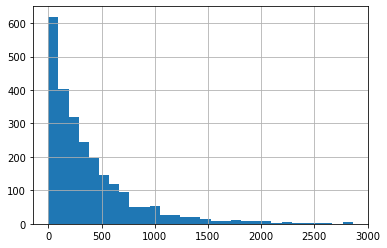

In [40]:
spent_for_meat_by_household.hist(bins=30)

In [41]:
max(spent_for_meat_by_household)

2859.909999999989

### Looking at the spending by Department

In [42]:
spent_by_dep = transac_prod.groupby('DEPARTMENT')\
                           .agg({'PAID_PRICE': 'sum'})\
                           .reset_index()\
                           .sort_values(by="PAID_PRICE", ascending=False)

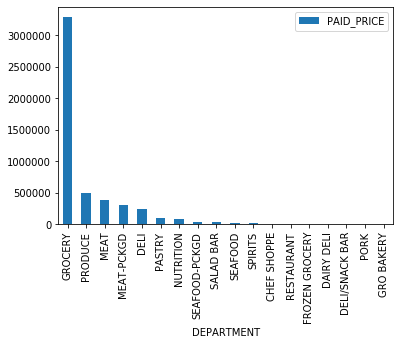

In [43]:
spent_by_dep.plot.bar(x="DEPARTMENT", y="PAID_PRICE")